<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Lab: Analyzing a real world data-set with SQL and Python</font></h1>

# Introduction

This notebook shows how to store a dataset into a database using and analyze data using SQL and Python. In this lab you will:
1. Understand a dataset of selected socioeconomic indicators in Chicago
1. Learn how to store data in an Db2 database on IBM Cloud instance
1. Solve example problems to practice your SQL skills 

## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2), but to summarize, the dataset has the following variables:

* **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

* **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

* **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

* **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

* **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

* **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

* **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

* **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database
Let us first load the SQL extension and establish a connection with the database

In [1]:
%load_ext sql

In [2]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
%sql ibm_db_sa://ldv88401:tmqrtg0^rqdxf1tl@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB

'Connected: ldv88401@BLUDB'

### Store the dataset in a Table
##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the dataset source .CSV from the internet into pandas dataframe

##### Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table

In [3]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://ldv88401:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

##### You can verify that the table creation was successful by making a basic query like:

In [4]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://ldv88401:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,hardship_index,per_capita_income_,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,percent_households_below_poverty,percent_of_housing_crowded
0,1.0,Rogers Park,39.0,23939,8.7,18.2,27.5,23.6,7.7
1,2.0,West Ridge,46.0,23040,8.8,20.8,38.5,17.2,7.8
2,3.0,Uptown,20.0,35787,8.9,11.8,22.2,24.0,3.8
3,4.0,Lincoln Square,17.0,37524,8.2,13.4,25.5,10.9,3.4
4,5.0,North Center,6.0,57123,5.2,4.5,26.2,7.5,0.3


## Problems

### Problem 1

##### How many rows are in the dataset?

In [6]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * ibm_db_sa://ldv88401:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
78


Double-click __here__ for the solution.

<!-- Hint:

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

Correct answer: 78

-->

### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?

In [11]:
%sql SELECT count(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

 * ibm_db_sa://ldv88401:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
38


Double-click __here__ for the solution.

<!-- Hint:

%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;
Correct answer: 38
-->


### Problem 3

##### What is the maximum value of hardship index in this dataset?

In [18]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * ibm_db_sa://ldv88401:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
98.0


Double-click __here__ for the solution.

<!-- Hint:

%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

Correct answer: 98.0
-->


### Problem 4

##### Which community area which has the highest hardship index?


In [19]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = 98.0;

 * ibm_db_sa://ldv88401:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


Double-click __here__ for the solution.

<!-- Hint:

## We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

## or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

Correct answer: 'Riverdale'
-->

### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?

In [20]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

 * ibm_db_sa://ldv88401:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


Double-click __here__ for the solution.

<!-- Hint:

%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

Correct answer:Lake View,Lincoln Park, Near North Side, Loop
-->


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.

 * ibm_db_sa://ldv88401:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


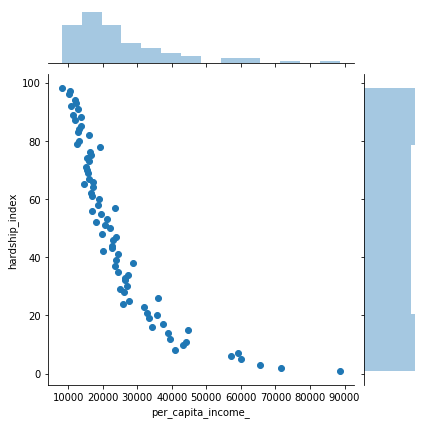

In [26]:
import seaborn as sns
df = %sql SELECT per_capita_income_,hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index',data=df.DataFrame());
#We see that as the per capita income increases, the hardship index decreases.i.e.there is a negative correlation between hardship index and per capita income.

Double-click __here__ for the solution.

<!-- Hint:
# if the import command gives ModuleNotFoundError: No module named 'seaborn'
# then uncomment the following line i.e. delete the # to install the seaborn package 
# !pip install seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

Correct answer:You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. 
-->


In [31]:
%sql SELECT per_capita_income_,percent_households_below_poverty FROM chicago_socioeconomic_data;

 * ibm_db_sa://ldv88401:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


per_capita_income_,percent_households_below_poverty
23939,23.6
23040,17.2
35787,24.0
37524,10.9
57123,7.5
60058,11.4
71551,12.3
88669,12.9
40959,3.3
32875,5.4


 * ibm_db_sa://ldv88401:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


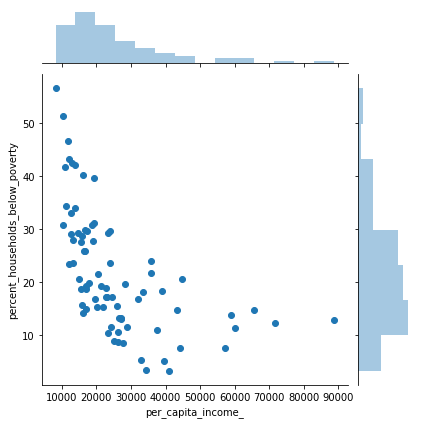

In [36]:
import seaborn as sns
df = %sql SELECT per_capita_income_,percent_households_below_poverty FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty',data=df.DataFrame())

 * ibm_db_sa://ldv88401:***@dashdb-txn-sbox-yp-lon02-01.services.eu-gb.bluemix.net:50000/BLUDB
Done.


ValueError: Could not interpret input 'percent_households_below_poverty'

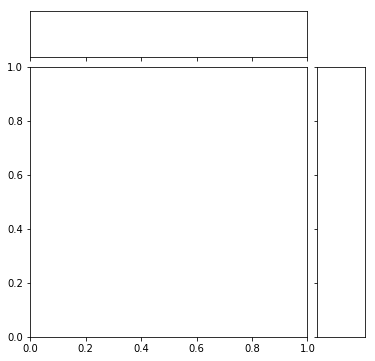

In [37]:
import seaborn as sns
df = %sql SELECT per_capita_income_,percent_aged_16_unemployed FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty',data=df.DataFrame())

### Conclusion

##### Now that you know how to do basic exploratory data analysis using SQL and python visualization tools, you can further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Try to create interesting visualizations!

## Summary

##### In this lab you learned how to store a real world data set from the internet in a database (Db2 on IBM Cloud), gain insights into data using SQL queries. You also visualized a portion of the data in the database to see what story it tells.

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).
